In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ML Project/DATA")
!ls

kartik.wav  shubham1.wav  shubham2.wav


In [ ]:
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

def energy(audio_file,sr=22050) -> np.ndarray:
  return np.log(librosa.feature.rms(y=audio_file,frame_length=int(sr*0.25),hop_length=int(sr*0.15)))

#calculate thresholds seprately
def VAD(y: np.ndarray, classification_threshold ,percentile_threshold=75):
  ret = []
  rmse_l = []
  window_size_samples = 22050 * 2

  for i in tqdm(range(0, len(y) - window_size_samples + 1, window_size_samples)):
     window = y[i:i + window_size_samples]
     rmse = np.percentile(energy(window),percentile_threshold)
     rmse_l.append(rmse)
     ret.append(True if rmse > classification_threshold else False)
  # print(ret)
  return (np.array(ret),np.array(rmse_l))

In [ ]:
sample_data, sr = librosa.load("shubham2.wav", sr=22050)

100%|██████████| 476/476 [00:03<00:00, 158.38it/s]


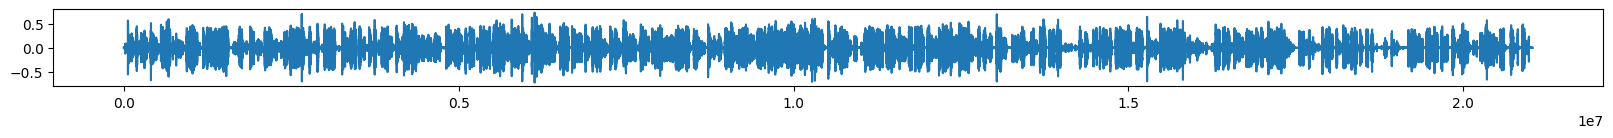

100%|██████████| 476/476 [00:00<00:00, 530.03it/s]


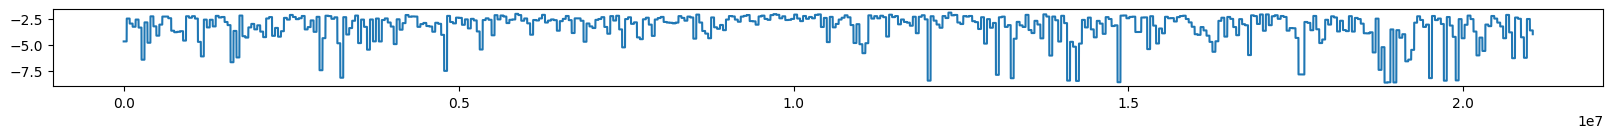

100%|██████████| 476/476 [00:01<00:00, 268.81it/s]


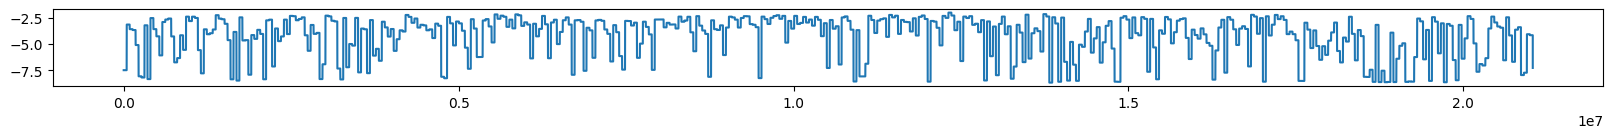

100%|██████████| 476/476 [00:00<00:00, 515.81it/s]


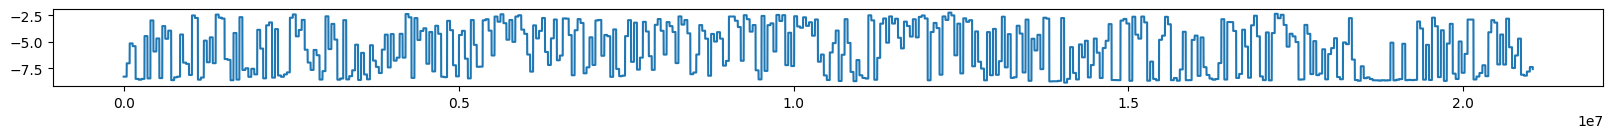

In [ ]:
import matplotlib.pyplot as plt
vvd = VAD(sample_data,0.2)[1]
vvc = sample_data

plt.figure(figsize = (20,1))
plt.plot(vvc)
plt.show()

vvd = VAD(sample_data,0.2,75)[1]
vvc = sample_data
plt.figure(figsize = (20,1))
plt.plot(vvd[np.linspace(0,len(vvd)-1,len(vvc),dtype = int)])
plt.show()

vvd = VAD(sample_data,0.2,50)[1]
vvc = sample_data
plt.figure(figsize = (20,1))
plt.plot(vvd[np.linspace(0,len(vvd)-1,len(vvc),dtype = int)])
plt.show()

vvd = VAD(sample_data,0.2,25)[1]
vvc = sample_data
plt.figure(figsize = (20,1))
plt.plot(vvd[np.linspace(0,len(vvd)-1,len(vvc),dtype = int)])
plt.show()

In [ ]:
vvd[1]

-7.041144847869873

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install pydub
from pydub import AudioSegment
from pydub.playback import play

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("minsithu/audio-noise-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.54M/1.54M [00:00<00:00, 112MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1


In [ ]:
import os

clean_files = [f for f in os.listdir("/content/drive/MyDrive/ML Project/DATA") if f.endswith('.wav')]
noise_files = [f for f in os.listdir("/root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1") if f.endswith('.wav')]

print("Clean files:", clean_files)
print("Noise files:", noise_files)


Clean files: ['kartik.wav', 'shubham1.wav', 'shubham2.wav']
Noise files: []


In [ ]:
!ls /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1


sample-10.webm	sample-2.webm  sample-4.webm  sample-6.webm  sample-8.webm
sample-1.webm	sample-3.webm  sample-5.webm  sample-7.webm  sample-9.webm


In [ ]:
from pydub import AudioSegment
import os

def convert_webm_to_wav(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    webm_files = [f for f in os.listdir(input_folder) if f.endswith('.webm')]

    for file in webm_files:
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, os.path.splitext(file)[0] + ".wav")

        # Load and convert
        audio = AudioSegment.from_file(input_path, format="webm")
        audio.export(output_path, format="wav")
        print(f"Converted: {input_path} -> {output_path}")

# Convert noise dataset from .webm to .wav
noise_input_folder = "/root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1"
noise_output_folder = "/content/noise_wav"  # Converted .wav files folder

convert_webm_to_wav(noise_input_folder, noise_output_folder)


Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1/sample-10.webm -> /content/noise_wav/sample-10.wav
Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1/sample-3.webm -> /content/noise_wav/sample-3.wav
Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1/sample-5.webm -> /content/noise_wav/sample-5.wav
Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1/sample-6.webm -> /content/noise_wav/sample-6.wav
Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1/sample-9.webm -> /content/noise_wav/sample-9.wav
Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1/sample-8.webm -> /content/noise_wav/sample-8.wav
Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/versions/1/sample-7.webm -> /content/noise_wav/sample-7.wav
Converted: /root/.cache/kagglehub/datasets/minsithu/audio-noise-dataset/ve

In [ ]:
from pydub import AudioSegment
import os
import random

def split_audio_by_duration(audio, window_ms):
    return [audio[i:i + window_ms] for i in range(0, len(audio), window_ms)]

def normalize_audio(audio):
    return audio.normalize()

def add_noise_with_ratio(clean_segment, noise_segment, mixing_ratio=0.2):
    # Normalize both segments
    clean_segment = normalize_audio(clean_segment)
    noise_segment = normalize_audio(noise_segment)

    # Adjust noise and clean levels based on mixing ratio
    noise_adjusted = noise_segment - (1 - mixing_ratio) * 20  # Reduce noise volume
    clean_adjusted = clean_segment - mixing_ratio * 20       # Reduce clean volume

    # Combine the adjusted audios
    combined = clean_adjusted.overlay(noise_adjusted)
    return combined

def process_audio_dataset(clean_folder, noise_folder, output_folder, window_duration=2000, mixing_ratio=0.2):
    """
    Processes clean audio by dividing it into fixed-duration windows and adding noise.

    Parameters:
    - clean_folder: Path to the folder containing clean audio files.
    - noise_folder: Path to the folder containing noise audio files.
    - output_folder: Path to save noisy audio files.
    - window_duration: Duration of each clean audio segment in milliseconds.
    - mixing_ratio: Proportion of noise in the final mix (0 to 1).
    """
    os.makedirs(output_folder, exist_ok=True)
    clean_files = [os.path.join(clean_folder, f) for f in os.listdir(clean_folder) if f.endswith('.wav')]
    noise_files = [os.path.join(noise_folder, f) for f in os.listdir(noise_folder) if f.endswith('.wav')]

    for clean_file in clean_files:
        clean_audio = AudioSegment.from_file(clean_file)
        clean_segments = split_audio_by_duration(clean_audio, window_duration)

        noisy_file_name = os.path.join(output_folder, os.path.basename(clean_file))
        noisy_audio = AudioSegment.silent(duration=0)  # Start with silence

        # Cycle through noise files for each clean segment
        noise_file_cycle = iter(noise_files)  # Create an iterator for noise files

        for clean_segment in clean_segments:
            try:
                noise_file = next(noise_file_cycle)
            except StopIteration:  # If all noise files are used, restart cycle
                noise_file_cycle = iter(noise_files)
                noise_file = next(noise_file_cycle)

            noise_audio_full = AudioSegment.from_file(noise_file)
            # Choose a random segment from the noise file
            start_time = random.randint(0, len(noise_audio_full) - len(clean_segment))
            noise_segment = noise_audio_full[start_time:start_time + len(clean_segment)]

            combined_segment = add_noise_with_ratio(clean_segment, noise_segment, mixing_ratio)
            noisy_audio += combined_segment

        # Export the noisy audio
        noisy_audio.export(noisy_file_name, format="wav")
        print(f"Processed: {clean_file} -> {noisy_file_name}")

# Paths for Colab
clean_audio_folder = "/content/drive/MyDrive/ML Project/DATA"  # Replace with your clean audio folder path
noise_audio_folder = "/content/noise_wav"  # Use converted .wav noise files
output_audio_folder = "/content/output_audio"  # Replace with desired output path
output_audio_folder2 = "/content/output_audio_40"
output_audio_folder3 = "/content/output_audio_50"
output_audio_folder4 = "/content/output_audio_60"
output_audio_folder5 = "/content/output_audio_70"

# Example: Creating directories and processing
os.makedirs(clean_audio_folder, exist_ok=True)
os.makedirs(output_audio_folder, exist_ok=True)
os.makedirs(output_audio_folder2, exist_ok=True)
os.makedirs(output_audio_folder3, exist_ok=True)
os.makedirs(output_audio_folder4, exist_ok=True)
os.makedirs(output_audio_folder5, exist_ok=True)

process_audio_dataset(clean_audio_folder, noise_audio_folder, output_audio_folder, window_duration=2000, mixing_ratio=0.3)
process_audio_dataset(clean_audio_folder, noise_audio_folder, output_audio_folder2, window_duration=2000, mixing_ratio=0.4)
process_audio_dataset(clean_audio_folder, noise_audio_folder, output_audio_folder3, window_duration=2000, mixing_ratio=0.5)
process_audio_dataset(clean_audio_folder, noise_audio_folder, output_audio_folder4, window_duration=2000, mixing_ratio=0.6)
process_audio_dataset(clean_audio_folder, noise_audio_folder, output_audio_folder5, window_duration=2000, mixing_ratio=0.7)

Processed: /content/drive/MyDrive/ML Project/DATA/kartik.wav -> /content/output_audio/kartik.wav
Processed: /content/drive/MyDrive/ML Project/DATA/shubham1.wav -> /content/output_audio/shubham1.wav
Processed: /content/drive/MyDrive/ML Project/DATA/shubham2.wav -> /content/output_audio/shubham2.wav
Processed: /content/drive/MyDrive/ML Project/DATA/kartik.wav -> /content/output_audio_40/kartik.wav
Processed: /content/drive/MyDrive/ML Project/DATA/shubham1.wav -> /content/output_audio_40/shubham1.wav
Processed: /content/drive/MyDrive/ML Project/DATA/shubham2.wav -> /content/output_audio_40/shubham2.wav
Processed: /content/drive/MyDrive/ML Project/DATA/kartik.wav -> /content/output_audio_50/kartik.wav
Processed: /content/drive/MyDrive/ML Project/DATA/shubham1.wav -> /content/output_audio_50/shubham1.wav
Processed: /content/drive/MyDrive/ML Project/DATA/shubham2.wav -> /content/output_audio_50/shubham2.wav
Processed: /content/drive/MyDrive/ML Project/DATA/kartik.wav -> /content/output_audio

In [ ]:
import librosa
import numpy as np

def extract_mfccs(audio_file, window_size_seconds=2, sr=22050):

  y, sr = librosa.load(audio_file, sr=sr)
  window_size_samples = int(window_size_seconds * sr)
  mfccs_list = []

  for i in range(0, len(y) - window_size_samples + 1, window_size_samples):
    window = y[i:i + window_size_samples]
    mfccs = librosa.feature.mfcc(y=window, sr=sr, n_mfcc=13)
    mfccs_list.append(mfccs)

  return mfccs_list

mfccs_per_audio_clean = {}

for audio_file in os.listdir("."):
  if audio_file.endswith(".wav"):
    mfccs_list = extract_mfccs(audio_file)
    mfccs_per_audio_clean[audio_file] = mfccs_list

mfccs_per_audio_clean['kartik.wav']

[array([[-724.37427 , -724.37427 , -724.37427 , ..., -341.41608 ,
         -316.51953 , -289.5327  ],
        [   0.      ,    0.      ,    0.      , ...,  132.44547 ,
          123.73703 ,  116.186935],
        [   0.      ,    0.      ,    0.      , ...,  -62.066284,
          -16.438078,   11.097401],
        ...,
        [   0.      ,    0.      ,    0.      , ...,  -30.840244,
          -17.827705,  -11.166912],
        [   0.      ,    0.      ,    0.      , ...,   -9.964922,
          -15.784071,   -9.706356],
        [   0.      ,    0.      ,    0.      , ...,  -18.574144,
          -18.559357,  -11.373009]], dtype=float32),
 array([[-299.14377   , -344.14642   , -457.7178    , ..., -438.59103   ,
         -446.38947   , -415.5604    ],
        [ 118.04532   ,  128.07018   ,  162.04097   , ...,  179.74414   ,
          145.54095   ,  123.05673   ],
        [  19.152557  ,   18.872131  ,    9.129423  , ...,  -55.673676  ,
          -31.151953  ,  -11.016855  ],
        ...,
   

In [ ]:
mfccs_per_audio_clean['kartik.wav'][1].shape

(13, 87)

In [ ]:
os.chdir("/content/")
!ls

clean_audio  noise_wav	      output_audio     output_audio_50	output_audio_70
drive	     noisy_files_ram  output_audio_40  output_audio_60	sample_data


In [265]:
import os
import numpy as np
from pydub import AudioSegment
from scipy.signal import butter, sosfilt

In [266]:
import os
import librosa
import numpy as np
import soundfile as sf

def apply_cms(mfcc):
    """
    Apply Cepstral Mean Subtraction (CMS) to MFCC features.

    Parameters:
    - mfcc: np.ndarray, MFCC feature matrix (shape: [n_mfcc, n_frames]).

    Returns:
    - Normalized MFCC feature matrix after CMS.
    """
    return mfcc - np.mean(mfcc, axis=1, keepdims=True)
def extract_mfccs_n(audio_file, window_size_seconds=2, sr=22050):

  y, sr = librosa.load(audio_file, sr=sr)
  window_size_samples = int(window_size_seconds * sr)
  mfccs_list = []

  for i in range(0, len(y) - window_size_samples + 1, window_size_samples):
    window = y[i:i + window_size_samples]
    mfccs = librosa.feature.mfcc(y=window, sr=sr, n_mfcc=13)
    mfcc_cms = apply_cms(mfccs)
    mfccs_list.append(mfcc_cms)

  return mfccs_list

In [235]:

def preprocess_with_cms(input_folder, output_folder, n_mfcc=13, sr=16000):
    """
    Applies CMS to noise audio files and saves the normalized files.

    Parameters:
    - input_folder: str, path to the folder containing noise audio files.
    - output_folder: str, path to save the processed audio files.
    - n_mfcc: int, number of MFCCs to extract.
    - sr: int, sampling rate for audio processing.
    """
    os.makedirs(output_folder, exist_ok=True)

    for file_name in os.listdir(input_folder):
        if file_name.endswith('.wav'):  # Process only .wav files
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            # Load audio
            audio, sample_rate = librosa.load(input_path, sr=sr)

            # Compute MFCCs
            mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

            # Apply CMS
            mfcc_cms = apply_cms(mfcc)

            # Optionally, reconstruct the signal (note: this may introduce artifacts)
            reconstructed_audio = librosa.feature.inverse.mfcc_to_audio(mfcc_cms, sr=sample_rate)

            # Save the processed audio
            sf.write(output_path, reconstructed_audio, sample_rate)
            print(f"Processed and saved: {output_path}")

# # Example usage
# input_folder = "/content/noise_wav"  # Folder containing original noise files
# output_folder = "/content/cms_noise"  # Folder to save CMS-processed noise files

# Process files with CMS



In [270]:
# Directory containing noisy audio files
# noisy_audio_dir = "/content/output_audio"  # Replace with your directory

# # Directory to save enhanced audio files
# output_dir = "/content/enhanced_audio_30"  # Replace with desired output directory
# os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
# # preprocess_with_cms(noisy_audio_dir, output_dir, n_mfcc=13, sr=22050)


# print("Speech enhancement completed for all files in the directory.")

mfccs_per_audio_noise = {}
for audio_file in os.listdir("/content/output_audio"):
    print(audio_file)
    if audio_file.endswith('.wav'):
      mfccs_list = extract_mfccs(os.path.join("/content/output_audio", audio_file))

      # Check if the key already exists
      if audio_file in mfccs_per_audio_noise:
        mfccs_per_audio_noise[audio_file].extend(mfccs_list)
      else:
        mfccs_per_audio_noise[audio_file] = mfccs_list
mfccs_per_audio_noise['kartik.wav'][0]

kartik.wav
shubham2.wav
shubham1.wav


array([[-213.88562   , -258.82278   , -376.34747   , ..., -233.49902   ,
        -214.33893   , -188.69896   ],
       [ 122.045845  ,  144.009     ,  185.58029   , ...,  135.96768   ,
         124.98904   ,  117.49247   ],
       [  -6.1742415 ,    3.998333  ,   15.225752  , ...,  -57.43595   ,
         -17.148104  ,   10.552336  ],
       ...,
       [  -3.7145102 ,   -2.5940983 ,    2.7351074 , ...,  -27.092388  ,
         -18.061512  ,  -12.244071  ],
       [   6.0270977 ,    7.69487   ,    0.78903806, ...,   -8.209518  ,
         -15.501514  ,  -10.205056  ],
       [   9.133547  ,    8.280888  ,   -3.7626953 , ...,  -15.297827  ,
         -18.877274  ,  -12.51664   ]], dtype=float32)

In [271]:
# # Directory containing noisy audio files
# noisy_audio_dir = "/content/output_audio_40"  # Replace with your directory

# # Directory to save enhanced audio files
# output_dir = "/content/enhanced_audio_40"  # Replace with desired output directory
# os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# preprocess_with_cms(noisy_audio_dir, output_dir, n_mfcc=13, sr=16000)

# print("Speech enhancement completed for all files in the directory.")
for audio_file in os.listdir("/content/output_audio_40"):
    print(audio_file)
    if audio_file.endswith('.wav'):
      mfccs_list = extract_mfccs(os.path.join("/content/output_audio_40", audio_file))

      # Check if the key already exists
      if audio_file in mfccs_per_audio_noise:
        mfccs_per_audio_noise[audio_file].extend(mfccs_list)
      else:
        mfccs_per_audio_noise[audio_file] = mfccs_list
mfccs_per_audio_noise['shubham1.wav'][0]

kartik.wav
shubham2.wav
shubham1.wav


array([[-3.42312286e+02, -3.42733917e+02, -3.38049042e+02, ...,
        -4.40691345e+02, -4.44861816e+02, -4.57456940e+02],
       [ 1.27090294e+02,  1.32539581e+02,  1.38391983e+02, ...,
         1.43858444e+02,  1.43089966e+02,  1.26513687e+02],
       [ 1.15212841e+01,  4.98458862e+00,  8.93697357e+00, ...,
         9.66650581e+00,  1.23023567e+01,  1.50193977e+01],
       ...,
       [ 2.59090090e+00,  7.32832670e+00,  1.31025343e+01, ...,
         1.86926854e+00, -1.34474659e+00,  3.39763403e-01],
       [ 2.50185032e+01,  2.33883553e+01,  1.66889095e+01, ...,
         1.24664402e+01,  9.41878414e+00,  6.52117729e+00],
       [ 6.54546404e+00,  4.06258965e+00,  9.49975109e+00, ...,
         9.33492279e+00,  7.76837540e+00,  9.90293312e+00]], dtype=float32)

In [272]:
# # Directory containing noisy audio files
# noisy_audio_dir = "/content/output_audio_50"  # Replace with your directory

# # Directory to save enhanced audio files
# output_dir = "/content/enhanced_audio_50"  # Replace with desired output directory
# os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# preprocess_with_cms(noisy_audio_dir, output_dir, n_mfcc=13, sr=22050)

# print("Speech enhancement completed for all files in the directory.")
for audio_file in os.listdir("/content/output_audio_50"):
    print(audio_file)
    if audio_file.endswith('.wav'):
      mfccs_list = extract_mfccs(os.path.join("/content/output_audio_50", audio_file))

      # Check if the key already exists
      if audio_file in mfccs_per_audio_noise:
        mfccs_per_audio_noise[audio_file].extend(mfccs_list)
      else:
        mfccs_per_audio_noise[audio_file] = mfccs_list
mfccs_per_audio_noise['shubham1.wav'][0]

kartik.wav
shubham2.wav
shubham1.wav


array([[-3.42312286e+02, -3.42733917e+02, -3.38049042e+02, ...,
        -4.40691345e+02, -4.44861816e+02, -4.57456940e+02],
       [ 1.27090294e+02,  1.32539581e+02,  1.38391983e+02, ...,
         1.43858444e+02,  1.43089966e+02,  1.26513687e+02],
       [ 1.15212841e+01,  4.98458862e+00,  8.93697357e+00, ...,
         9.66650581e+00,  1.23023567e+01,  1.50193977e+01],
       ...,
       [ 2.59090090e+00,  7.32832670e+00,  1.31025343e+01, ...,
         1.86926854e+00, -1.34474659e+00,  3.39763403e-01],
       [ 2.50185032e+01,  2.33883553e+01,  1.66889095e+01, ...,
         1.24664402e+01,  9.41878414e+00,  6.52117729e+00],
       [ 6.54546404e+00,  4.06258965e+00,  9.49975109e+00, ...,
         9.33492279e+00,  7.76837540e+00,  9.90293312e+00]], dtype=float32)

In [ ]:
mfccs_per_audio_noise['kartik.wav'][1].shape

In [273]:
# # Directory containing noisy audio files
# noisy_audio_dir = "/content/output_audio_60"  # Replace with your directory

# # Directory to save enhanced audio files
# output_dir = "/content/enhanced_audio_60"  # Replace with desired output directory
# os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# preprocess_with_cms(noisy_audio_dir, output_dir, n_mfcc=13, sr=22050)

# print("Speech enhancement completed for all files in the directory.")
for audio_file in os.listdir("/content/output_audio_60"):
    print(audio_file)
    if audio_file.endswith('.wav'):
      mfccs_list = extract_mfccs(os.path.join("/content/output_audio_60", audio_file))

      # Check if the key already exists
      if audio_file in mfccs_per_audio_noise:
        mfccs_per_audio_noise[audio_file].extend(mfccs_list)
      else:
        mfccs_per_audio_noise[audio_file] = mfccs_list
mfccs_per_audio_noise['shubham1.wav'][0]

kartik.wav
shubham2.wav
shubham1.wav


array([[-3.42312286e+02, -3.42733917e+02, -3.38049042e+02, ...,
        -4.40691345e+02, -4.44861816e+02, -4.57456940e+02],
       [ 1.27090294e+02,  1.32539581e+02,  1.38391983e+02, ...,
         1.43858444e+02,  1.43089966e+02,  1.26513687e+02],
       [ 1.15212841e+01,  4.98458862e+00,  8.93697357e+00, ...,
         9.66650581e+00,  1.23023567e+01,  1.50193977e+01],
       ...,
       [ 2.59090090e+00,  7.32832670e+00,  1.31025343e+01, ...,
         1.86926854e+00, -1.34474659e+00,  3.39763403e-01],
       [ 2.50185032e+01,  2.33883553e+01,  1.66889095e+01, ...,
         1.24664402e+01,  9.41878414e+00,  6.52117729e+00],
       [ 6.54546404e+00,  4.06258965e+00,  9.49975109e+00, ...,
         9.33492279e+00,  7.76837540e+00,  9.90293312e+00]], dtype=float32)

In [274]:
# Directory containing noisy audio files
# noisy_audio_dir = "/content/output_audio_70"  # Replace with your directory

# # Directory to save enhanced audio files
# output_dir = "/content/enhanced_audio_70"  # Replace with desired output directory
# os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
# preprocess_with_cms(noisy_audio_dir, output_dir, n_mfcc=13, sr=22050)

# print("Speech enhancement completed for all files in the directory.")
for audio_file in os.listdir("/content/output_audio_70"):
    print(audio_file)
    if audio_file.endswith('.wav'):
      mfccs_list = extract_mfccs(os.path.join("/content/output_audio_70", audio_file))

      # Check if the key already exists
      if audio_file in mfccs_per_audio_noise:
        mfccs_per_audio_noise[audio_file].extend(mfccs_list)
      else:
        mfccs_per_audio_noise[audio_file] = mfccs_list
mfccs_per_audio_noise['shubham1.wav'][0]

kartik.wav
shubham2.wav
shubham1.wav


array([[-3.42312286e+02, -3.42733917e+02, -3.38049042e+02, ...,
        -4.40691345e+02, -4.44861816e+02, -4.57456940e+02],
       [ 1.27090294e+02,  1.32539581e+02,  1.38391983e+02, ...,
         1.43858444e+02,  1.43089966e+02,  1.26513687e+02],
       [ 1.15212841e+01,  4.98458862e+00,  8.93697357e+00, ...,
         9.66650581e+00,  1.23023567e+01,  1.50193977e+01],
       ...,
       [ 2.59090090e+00,  7.32832670e+00,  1.31025343e+01, ...,
         1.86926854e+00, -1.34474659e+00,  3.39763403e-01],
       [ 2.50185032e+01,  2.33883553e+01,  1.66889095e+01, ...,
         1.24664402e+01,  9.41878414e+00,  6.52117729e+00],
       [ 6.54546404e+00,  4.06258965e+00,  9.49975109e+00, ...,
         9.33492279e+00,  7.76837540e+00,  9.90293312e+00]], dtype=float32)

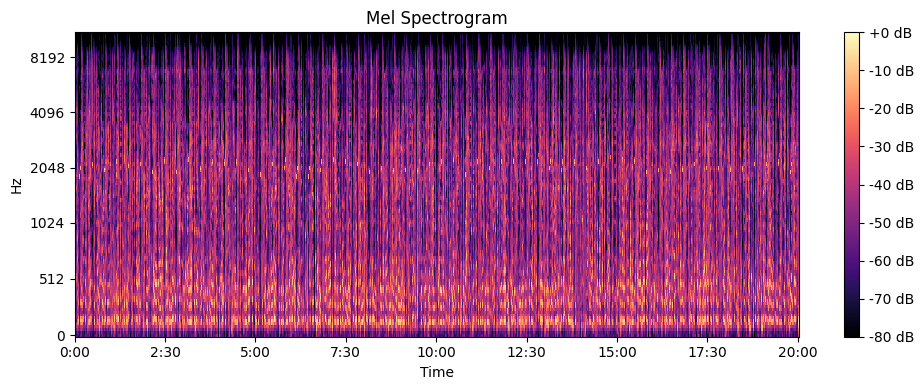

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_melspectrogram(audio_file, sr=22050):
  y, sr = librosa.load(audio_file, sr=sr)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

  plt.figure(figsize=(10, 4))
  librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel Spectrogram')
  plt.tight_layout()
  plt.show()

audio_file = "/content/output_audio/kartik.wav"
plot_melspectrogram(audio_file)

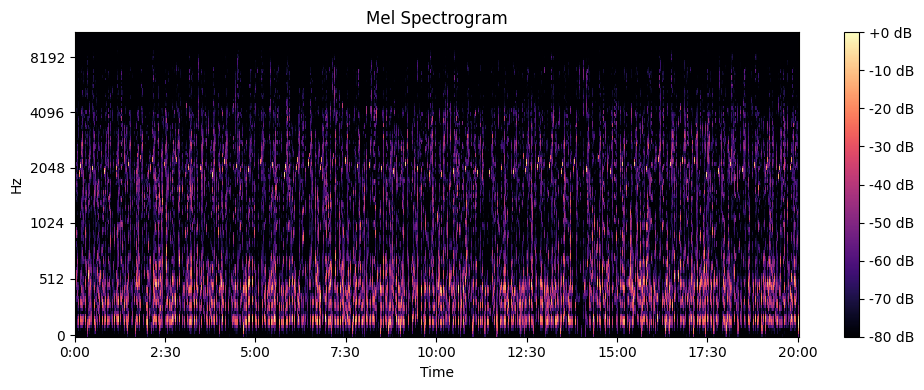

In [195]:
audio_file = "/content/enhanced_audio_40/kartik.wav"
plot_melspectrogram(audio_file)

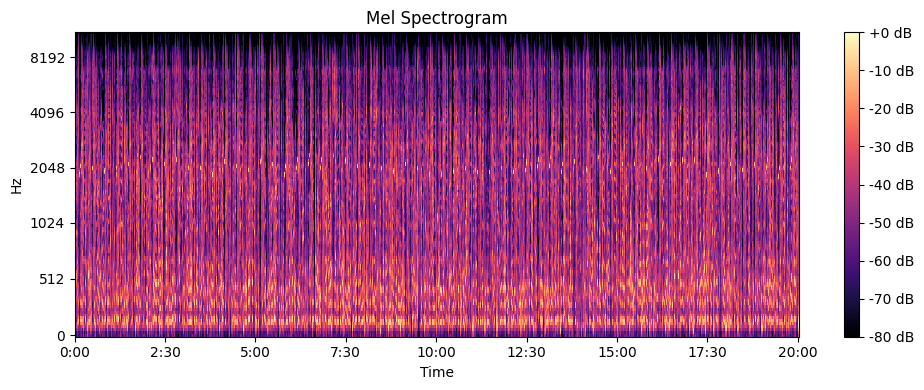

In [173]:
audio_file = "/content/output_audio_40/kartik.wav"
plot_melspectrogram(audio_file)

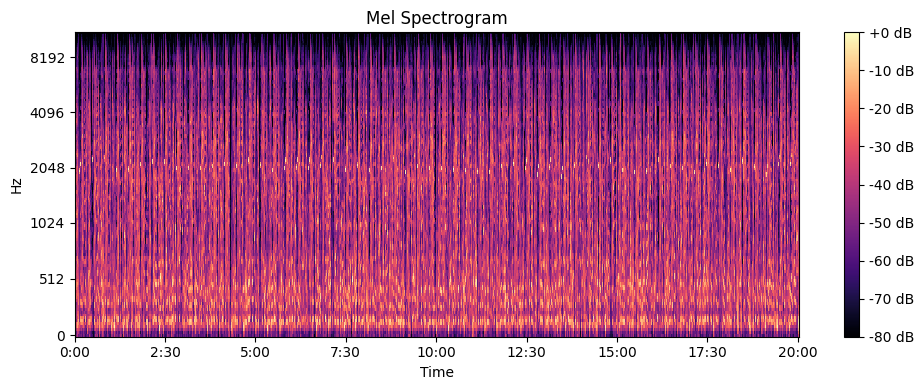

In [ ]:
audio_file = "/content/output_audio_50/kartik.wav"
plot_melspectrogram(audio_file)

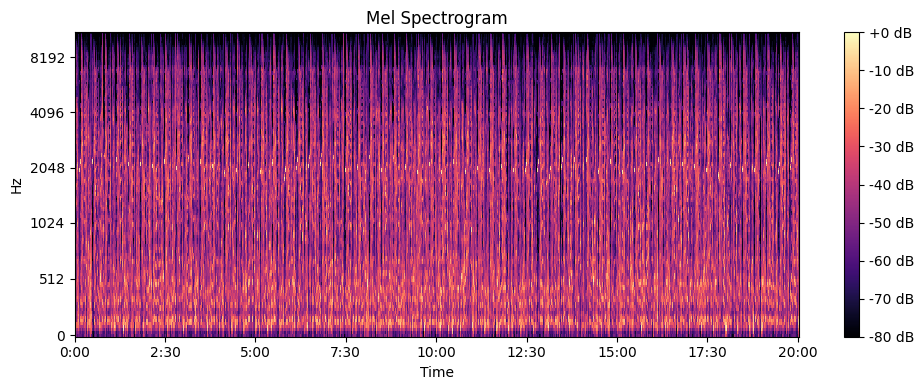

In [ ]:
audio_file = "/content/output_audio_60/kartik.wav"
plot_melspectrogram(audio_file)

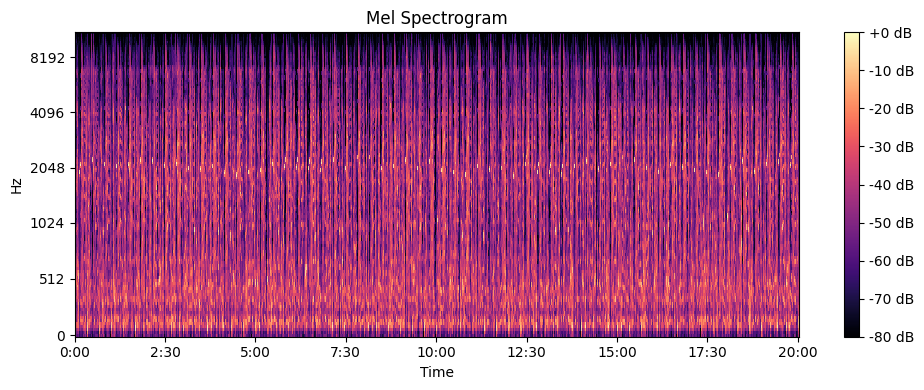

In [ ]:
audio_file = "/content/output_audio_70/kartik.wav"
plot_melspectrogram(audio_file)

In [ ]:
# train_mfccs = []
# test_mfccs = []

# for file, mfcc_list in mfccs_per_audio.items():
#     # Perform train-test split on the MFCCs for this file
#     train_mfccs_file, test_mfccs_file = train_test_split(mfcc_list, test_size=0.2, random_state=42)

#     # Append to respective lists
#     train_mfccs.extend(train_mfccs_file)
#     test_mfccs.extend(test_mfccs_file)

# # Convert to numpy arrays
# train_data = np.hstack(train_mfccs)
# test_data = np.hstack(test_mfccs)
# train_data.shape, test_data.shape

((13, 99180), (13, 25056))

In [275]:
import numpy as np
from sklearn.model_selection import train_test_split

# Combine clean and noisy MFCCs
all_mfccs = {**mfccs_per_audio_clean, **mfccs_per_audio_noise}

train_mfccs = []
test_mfccs = []
train_labels = []  # To store labels (0 for clean, 1 for noisy)
test_labels = []

for file, mfcc_list in all_mfccs.items():
    # Split MFCCs for each file
    train_mfccs_file, test_mfccs_file = train_test_split(mfcc_list, test_size=0.25, random_state=42)

    # Append to respective lists
    train_mfccs.extend(train_mfccs_file)
    test_mfccs.extend(test_mfccs_file)

    # Create and append labels: 0 for clean, 1 for noisy
    label = 0 if file in mfccs_per_audio_clean else 1
    train_labels.extend([label] * len(train_mfccs_file))
    test_labels.extend([label] * len(test_mfccs_file))

# Convert to numpy arrays
train_data = np.hstack(train_mfccs)  # Stack MFCCs horizontally
test_data = np.hstack(test_mfccs)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train data shape: (13, 487983)
Test data shape: (13, 162777)
Train labels shape: (5609,)
Test labels shape: (1871,)


In [276]:
from sklearn.mixture import GaussianMixture

# Number of Gaussian components for UBM
n_components = 512  # Adjust this based on your dataset

# Fit UBM model
gmm = GaussianMixture(n_components=n_components, covariance_type='diag')
gmm.fit(train_data.T)

GaussianMixture(covariance_type='diag', n_components=512)

In [277]:
# Compute the log-likelihood of the test data
log_likelihood = gmm.score(test_data.T)
print(f"Log-Likelihood on Test Data: {log_likelihood}")

Log-Likelihood on Test Data: -52.36285496334673


In [ ]:
# def max_likelihood(test,gmm):
#   likelihood =[]
#   likelihood_normalize=[]
#   for model in gmm:
#     likelihood.append(model.score(test))
#   total = np.sum(likelihood)
#   for model in gmm:
#     likelihood_normalize.append(model.score(test)/(total-model.score(test)))
#   return likelihood_normalize.index(max(likelihood_normalize))

In [278]:
os.chdir("/content/drive/My Drive/ML Project/")
!ls

DATA  ram_test.npy  ram_train.npy  Ram.wav  test_data.npy  train_data.npy


In [115]:
def process_audio_dataset2(clean_folder, noise_folder, output_folder, window_duration=2000, mixing_ratio=0.2, name="ram"):
    os.makedirs(output_folder, exist_ok=True)
    clean_files = [os.path.join(clean_folder, f) for f in os.listdir(clean_folder) if f.endswith('.wav')]
    noise_files = [os.path.join(noise_folder, f) for f in os.listdir(noise_folder) if f.endswith('.wav')]

    for clean_file in clean_files:
        clean_audio = AudioSegment.from_file(clean_file)
        clean_segments = split_audio_by_duration(clean_audio, window_duration)

        noisy_file_name = os.path.join(output_folder, name)
        noisy_audio = AudioSegment.silent(duration=0)  # Start with silence

        # Cycle through noise files for each clean segment
        noise_file_cycle = iter(noise_files)  # Create an iterator for noise files

        for clean_segment in clean_segments:
            try:
                noise_file = next(noise_file_cycle)
            except StopIteration:  # If all noise files are used, restart cycle
                noise_file_cycle = iter(noise_files)
                noise_file = next(noise_file_cycle)

            noise_audio_full = AudioSegment.from_file(noise_file)
            # Choose a random segment from the noise file
            start_time = random.randint(0, len(noise_audio_full) - len(clean_segment))
            noise_segment = noise_audio_full[start_time:start_time + len(clean_segment)]

            combined_segment = add_noise_with_ratio(clean_segment, noise_segment, mixing_ratio)
            noisy_audio += combined_segment

        # Export the noisy audio
        noisy_audio.export(noisy_file_name, format="wav")
        print(f"Processed: {clean_file} -> {noisy_file_name}")

In [133]:
# Paths
clean_audio_path = "/content/drive/My Drive/ML Project/"  # Path to the clean audio file
noise_audio_path = "/content/noise_wav"  # Path to the noise audio file
output_folder = "/content/noisy_files_ram"  # Directory to save the output files

process_audio_dataset2(clean_audio_path, noise_audio_path, output_folder, window_duration=2000, mixing_ratio=0.3, name="Ram30.wav")
process_audio_dataset2(clean_audio_path, noise_audio_path, output_folder, window_duration=2000, mixing_ratio=0.4, name="Ram40.wav")
process_audio_dataset2(clean_audio_path, noise_audio_path, output_folder, window_duration=2000, mixing_ratio=0.5, name="Ram50.wav")
process_audio_dataset2(clean_audio_path, noise_audio_path, output_folder, window_duration=2000, mixing_ratio=0.6, name="Ram60.wav")
process_audio_dataset2(clean_audio_path, noise_audio_path, output_folder, window_duration=2000, mixing_ratio=0.7, name="Ram70.wav")

Processed: /content/drive/My Drive/ML Project/Ram.wav -> /content/noisy_files_ram/Ram30.wav
Processed: /content/drive/My Drive/ML Project/Ram.wav -> /content/noisy_files_ram/Ram40.wav
Processed: /content/drive/My Drive/ML Project/Ram.wav -> /content/noisy_files_ram/Ram50.wav
Processed: /content/drive/My Drive/ML Project/Ram.wav -> /content/noisy_files_ram/Ram60.wav
Processed: /content/drive/My Drive/ML Project/Ram.wav -> /content/noisy_files_ram/Ram70.wav


In [199]:
# Directory containing noisy audio files
# noisy_audio_dir = "/content/noisy_files_ram"  # Replace with your directory

# # Directory to save enhanced audio files
# output_dir = "/content/enhanced_audio_ram"  # Replace with desired output directory
# os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

# # Process each audio file in the directory
# for filename in os.listdir(noisy_audio_dir):
#     if filename.endswith(".wav"):  # Process only .wav files
#         noisy_audio_path = os.path.join(noisy_audio_dir, filename)
#         output_path = os.path.join(output_dir, filename)  # Use same filename for output

#         wiener_filter_enhancement(noisy_audio_path, output_path)

# print("Speech enhancement completed for all files in the directory.")

Enhanced audio saved to: /content/enhanced_audio_ram/Ram30.wav
Enhanced audio saved to: /content/enhanced_audio_ram/Ram60.wav
Enhanced audio saved to: /content/enhanced_audio_ram/Ram40.wav
Enhanced audio saved to: /content/enhanced_audio_ram/Ram50.wav
Enhanced audio saved to: /content/enhanced_audio_ram/Ram70.wav
Speech enhancement completed for all files in the directory.


In [279]:
os.chdir("/content/drive/My Drive/ML Project/")
!ls

DATA  ram_test.npy  ram_train.npy  Ram.wav  test_data.npy  train_data.npy


In [280]:
mfccs_ram_noisy = {}
for audio_file in os.listdir("/content/noisy_files_ram"):
    print(audio_file)
    if audio_file.endswith(".wav"):
      mfccs_list = extract_mfccs(os.path.join("/content/noisy_files_ram", audio_file))

      # Check if the key already exists
      if audio_file in mfccs_ram_noisy:
        mfccs_ram_noisy[audio_file].extend(mfccs_list)
      else:
        mfccs_ram_noisy[audio_file] = mfccs_list
# print(mfccs_ram_noisy)
# mfccs_ram_noisy = np.hstack(mfccs_ram_noisy)
# print(len(mfccs_ram_noisy[0]))
# print(mfccs_ram_noisy[0][0].shape)

.ipynb_checkpoints
Ram30.wav
Ram60.wav
Ram40.wav
Ram50.wav
Ram70.wav


In [ ]:
print(mfccs_ram_noisy)

In [281]:
for audio_file in os.listdir("."):
  if audio_file.endswith(".wav"):
    # Check if the key already exists
    mfccs_list = extract_mfccs(os.path.join(".", audio_file))
    if audio_file in mfccs_ram_noisy:
      mfccs_ram_noisy[audio_file].extend(mfccs_list)
    else:
      mfccs_ram_noisy[audio_file] = mfccs_list
    # mfccs_per_audio[audio_file] = mfccs_list

# for audio_file in os.listdir("."):
#   if audio_file.endswith(".wav"):
#     mfccs_ram_noise = extract_mfccs(audio_file)
#     # mfccs_per_audio[audio_file] = mfccs_list

# mfccs_ram = np.hstack(mfccs_ram)
# mfccs_ram_noisy.append(mfccs_ram)
print(len(mfccs_ram_noisy))

6


In [282]:
train_mfccs = []
test_mfccs = []

for file, mfcc_list in mfccs_ram_noisy.items():
    # Split MFCCs for each file
    train_mfccs_file, test_mfccs_file = train_test_split(mfcc_list, test_size=0.25, random_state=42)

    # Append to respective lists
    train_mfccs.extend(train_mfccs_file)
    test_mfccs.extend(test_mfccs_file)
# print(len(mfccs_ram))
# print(mfccs_ram[0].shape)
ram_test = np.hstack(test_mfccs)
print(ram_test.shape)
ram_train = np.hstack(train_mfccs)
print(ram_train.shape)

(13, 61596)
(13, 184788)


In [ ]:
# mfccs_ram_n = np.hstack(mfccs_ram+)
# print(len(mfccs_ram))
# print(mfccs_ram[0].shape)

In [283]:
import copy
def map_adapt(ubm, X, max_iter=100, r=16):
    gmm = copy.deepcopy(ubm)
    for lod in range(max_iter):
        prev_mean = gmm.means_
        print(lod,end=" , ")
        n = np.sum(gmm.predict_proba(X), axis=0).reshape(-1, 1) + 1e-7
        X_tilde = (1 / n) * gmm.predict_proba(X).T.dot(X)
        alpha = (n / (n + r)).reshape(-1, 1)
        gmm.means_ = alpha * X_tilde + (1 - alpha) * gmm.means_
        print(np.linalg.norm(gmm.means_-prev_mean))
        if(np.linalg.norm(gmm.means_-prev_mean) <1e-3):
            break
    return gmm

In [284]:
gmm_finetuned = map_adapt(gmm,ram_train.T,max_iter=100,r=32)

0 , 530.8582166612202
1 , 212.93562520859783
2 , 135.36437501175092
3 , 97.96543279816655
4 , 73.43666317104334
5 , 57.75060120782672
6 , 48.019437301608974
7 , 41.65721955714658
8 , 37.438074979265174
9 , 33.979473095668666
10 , 30.301175109176725
11 , 27.611922515253067
12 , 26.70033805331182
13 , 25.955387825280507
14 , 24.689658521572834
15 , 24.59568785452469
16 , 25.432314422070867
17 , 26.381586763617435
18 , 24.153742776880616
19 , 20.321074323095942
20 , 18.079695577891247
21 , 17.374959557875062
22 , 17.133302220119216
23 , 17.011635755758967
24 , 16.84843390190157
25 , 16.555930420000283
26 , 16.004308014142516
27 , 15.266258408147255
28 , 14.53440961770914
29 , 13.925715804025655
30 , 13.428187504729594
31 , 12.904962369346467
32 , 12.305945636539924
33 , 11.683771434121788
34 , 11.069781591644007
35 , 10.517616386051042
36 , 10.079294473030519
37 , 9.725413407435523
38 , 9.400139434380401
39 , 9.129018051717827
40 , 8.9838855525785
41 , 9.02388615896705
42 , 9.272493210314

In [285]:
def check_person(gmm,ubm,datapoint):
  return (gmm.score(datapoint.T) - ubm.score(datapoint.T))

In [286]:
check_person(gmm_finetuned,gmm,ram_train)

1.9578647186015914

In [287]:
mfcc_finetuned = ram_test.T
mfcc_ubm = test_data.T
labels_finetuned = np.ones(mfcc_finetuned.shape[0])
labels_ubm = np.zeros(mfcc_ubm.shape[0])
min_size = min(mfcc_finetuned.shape[1], mfcc_ubm.shape[1])

mfcc_finetuned_padded = np.array([np.pad(x, (0, max(0, min_size - len(x))), mode='constant')[:min_size] for x in mfcc_finetuned])
mfcc_ubm_padded = np.array([np.pad(x, (0, max(0, min_size - len(x))), mode='constant')[:min_size] for x in mfcc_ubm])

features = np.concatenate([mfcc_finetuned_padded, mfcc_ubm_padded], axis=0)
labels = np.concatenate([labels_finetuned, labels_ubm], axis=0)

df = pd.DataFrame(features)
df['label'] = labels

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-186.733444,89.901718,12.230469,54.402454,17.048145,-1.157425,-8.357847,-9.558339,-15.284029,3.026037,-2.175769,-1.653843,-21.167721,1.0
1,-148.761017,101.445534,1.194304,38.373466,8.846230,-3.703748,-19.497173,-12.436428,-17.851093,7.475589,-3.633748,-2.364964,-18.908012,1.0
2,-130.205856,118.166321,-12.431875,24.524399,1.011159,-0.309001,-25.142029,-11.509068,-17.189064,17.949226,4.080074,2.157505,-17.297462,1.0
3,-118.474632,125.375931,-19.235735,19.761395,3.590876,2.344861,-25.961758,-7.291913,-11.092941,19.562004,8.266448,6.964944,-6.255626,1.0
4,-120.985695,124.517334,-27.484638,20.223545,7.010159,0.369897,-30.283585,-9.424479,-13.863423,14.218679,8.158305,14.427638,-6.455178,1.0


In [288]:
def check_person2(gmm,ubm,datapoint):
  return (gmm.score(datapoint) - ubm.score(datapoint))

In [289]:
from sklearn.metrics import accuracy_score, roc_curve

In [290]:
predictions = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Extract the MFCC features (without the label)
    datapoint = row[:-1].values.reshape(1, -1)  # Keep it as a row vector with the correct number of features

    # Use the check_person function to get the score difference
    score_difference = check_person2(gmm_finetuned, gmm, datapoint)

    # Predict label based on the score difference (positive = 1, negative = 0)
    if score_difference > 0:
        predictions.append(1)
    else:
        predictions.append(0)

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Extract the true labels from the DataFrame
true_labels = df['label'].values

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 73.68%


In [291]:
# Calculate False Positive Rate, True Positive Rate, and thresholds using ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, [check_person2(gmm_finetuned, gmm, row[:-1].values.reshape(1, -1)) for _, row in df.iterrows()])

# Calculate Equal Error Rate (EER)
fnr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.abs(fpr - fnr))]
eer = fpr[np.nanargmin(np.abs(fpr - fnr))]

print(f'Equal Error Rate (EER): {eer * 100:.2f}%')

Equal Error Rate (EER): 25.90%


In [292]:
np.save('/content/drive/MyDrive/ML Project/train_data.npy', train_data)
np.save('/content/drive/MyDrive/ML Project/test_data.npy', test_data)

print("Train and test data saved to Google Drive.")

Train and test data saved to Google Drive.


In [214]:
np.save('/content/drive/MyDrive/ML Project/ram_train.npy', ram_train)
np.save('/content/drive/MyDrive/ML Project/ram_test.npy', ram_test)

print("Train and test data saved to Google Drive.")

Train and test data saved to Google Drive.
